Vathana Him, Dajonna Williams, Andrew Lindberg

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv to Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3 (1).csv
Saving Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv to Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2 (1).csv


In [ ]:
data_school = '/content/Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv'
data_census = '/content/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv'

# PART 1

In [ ]:
df_census = pd.read_csv(data_census)
df_school = pd.read_csv(data_school)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

# Census Data

In [ ]:
df_census.head(5)

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
pd.set_option("display.max_rows", 100)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
print("Dimensions: " + str(df_census.shape))
df_census.isnull().sum()

Dimensions: (78, 9)


COMMUNITY_AREA_NUMBER                           1
COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  1
dtype: int64

The df_census dataframe contains census data that shows the socio-economic conditions in Chicago. The three primary data type in this data frame are float, int, and pandas object. This dataframe has 9 variables (columns) and 78 observations (rows). When checking for the number of missing values in this dataframe, it was founded that columns 'COMMUNITY_AREA_NUMBER' and 'HARDSHIP_INDEX'  each have one missing value.

# School Data

In [ ]:
df_school.head(5)

,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,Collaborative Name,Adequate Yearly Progress Made?,Track Schedule,CPS Performance Policy Status,CPS Performance Policy Level,HEALTHY_SCHOOL_CERTIFIED,Safety Icon,SAFETY_SCORE,Family Involvement Icon,Family Involvement Score,Environment Icon,Environment Score,Instruction Icon,Instruction Score,Leaders Icon,Leaders Score,Teachers Icon,Teachers Score,Parent Engagement Icon,Parent Engagement Score,Parent Environment Icon,Parent Environment Score,AVERAGE_STUDENT_ATTENDANCE,Rate of Misconducts (per 100 students),Average Teacher Attendance,Individualized Education Program Compliance Rate,Pk-2 Literacy %,Pk-2 Math %,Gr3-5 Grade Level Math %,Gr3-5 Grade Level Read %,Gr3-5 Keep Pace Read %,Gr3-5 Keep Pace Math %,Gr6-8 Grade Level Math %,Gr6-8 Grade Level Read %,Gr6-8 Keep Pace Math%,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Exceeding Math %,ISAT Exceeding Reading %,ISAT Value Add Math,ISAT Value Add Read,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Strong,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Strong,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,NDA,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56.0,Average,44,Average,45.0,Weak,37.0,Strong,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,556,42,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721

In [ ]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   School ID                                          566 non-null    int64  
 1   NAME_OF_SCHOOL                                     566 non-null    object 
 2   Elementary, Middle, or High School                 566 non-null    object 
 3   Street Address                                     566 non-null    object 
 4   City                                               566 non-null    object 
 5   State                                              566 non-null    object 
 6   ZIP Code                                           566 non-null    int64  
 7   Phone Number                                       566 non-null    object 
 8   Link                                               565 non-null    object 
 9   Network Ma

In [ ]:
print("Dimension:" + str(df_school.shape))
df_school.isnull().sum()

Dimension:(566, 78)


School ID                                             0
NAME_OF_SCHOOL                                        0
Elementary, Middle, or High School                    0
Street Address                                        0
City                                                  0
State                                                 0
ZIP Code                                              0
Phone Number                                          0
Link                                                  1
Network Manager                                       0
Collaborative Name                                    0
Adequate Yearly Progress Made?                        0
Track Schedule                                        0
CPS Performance Policy Status                         0
CPS Performance Policy Level                          0
HEALTHY_SCHOOL_CERTIFIED                              0
Safety Icon                                           0
SAFETY_SCORE                                    

In [ ]:
#According to the city of Chicago website, NDA indicates No Data Available.
# replacing NDA for NaN
NDA_df_school = df_school.replace('NDA',np.NAN) 
NDA_df_school.isnull().sum()

School ID                                              0
NAME_OF_SCHOOL                                         0
Elementary, Middle, or High School                     0
Street Address                                         0
City                                                   0
State                                                  0
ZIP Code                                               0
Phone Number                                           0
Link                                                   1
Network Manager                                        0
Collaborative Name                                     0
Adequate Yearly Progress Made?                        18
Track Schedule                                         0
CPS Performance Policy Status                          5
CPS Performance Policy Level                           5
HEALTHY_SCHOOL_CERTIFIED                               0
Safety Icon                                           53
SAFETY_SCORE                   

The df_school dataframe contains data about public school assesment in the Chicago area. This dataframe has float, int, and pandas object data types. df_school dataframe consists of 78 variables (columns) and 566 observations (rows). This dataframe has missing values in columns: "Link", "SAFETY_SCORE", Environment Score", "Instruction Score", "AVERAGE_STUDENT_ATTENDANCE", "ISAT Exceeding Math %", "ISAT Exceeding Reading %', "ISAT Value Add Math", and "ISAT Value Add Read". 

This dataframe has further missing values indicated by 'NDA'. These missing values are to be expected because many of the columns are specific to performance measures for certain grades and the dataset contains information for elementary, middle, and high schools.This dataset has no variables with respective to time as each observation information is dependent on the School ID.

In [ ]:
l = ['School ID', 'COMMUNITY_AREA_NUMBER', 'NAME_OF_SCHOOL', 'CPS Performance Policy Status', 'HEALTHY_SCHOOL_CERTIFIED', 'SAFETY_SCORE', 
     'Environment Score', 'Instruction Score', 'Parent Engagement Score', 'AVERAGE_STUDENT_ATTENDANCE',
     'Average Teacher Attendance', 'COMMUNITY_AREA_NAME', 
     'COLLEGE_ENROLLMENT']
df_school_selected = df_school[l]


In [ ]:
df_school_selected.columns = df_school_selected.columns.str.strip().str.replace(' ', '_')


In [ ]:
df_school_selected.head(10)

,School_ID,COMMUNITY_AREA_NUMBER,NAME_OF_SCHOOL,CPS_Performance_Policy_Status,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Instruction_Score,Parent_Engagement_Score,AVERAGE_STUDENT_ATTENDANCE,Average_Teacher_Attendance,COMMUNITY_AREA_NAME,COLLEGE_ENROLLMENT
0,610038,7,Abraham Lincoln Elementary School,Not on Probation,Yes,99.0,74.0,66.0,56,96.00%,96.40%,LINCOLN PARK,813
1,610281,43,Adam Clayton Powell Paideia Community Academy ...,Not on Probation,No,54.0,74.0,84.0,46,95.60%,95.30%,SOUTH SHORE,521
2,610185,70,Adlai E Stevenson Elementary School,Not on Probation,No,61.0,50.0,36.0,47,95.70%,94.70%,ASHBURN,1324
3,609993,61,Agustin Lara Elementary Academy,Not on Probation,No,56.0,45.0,37.0,53,95.50%,95.80%,NEW CITY,556
4,610513,34,Air Force Academy High School,Not on Probation,Yes,49.0,60.0,55.0,53,93.30%,96.90%,ARMOUR SQUARE,302
5,610212,14,Albany Park Multicultural Academy,Not on Probation,No,66.0,66.0,71.0,46,97.00%,96.90%,ALBANY PARK,266
6,609720,5,Albert G Lane Technical High School,Not on Probation,No,88.0,62.0,52.0,NDA,96.30%,96.20%,NORTH CENTER,4368
7,610342,24,Albert R Sabin Elementary Magnet School,Probation,No,67.0,30.0,18.0,NDA,94.70%,95.00%,WEST TOWN,620
8,610524,5,Alcott High School for the Humanities,Not on Probation,No,70.0,67.0,51.0,57,92.70%,96.90%,NORTH CENTER,232
9,610209,14,Alessandro Volta Elementary School,Not on Probation,No,43.0,28.0,37.0,51,96.40%,95.90%,ALBANY PARK,1023


In [ ]:
df_school_selected.isnull().sum()

School_ID                         0
COMMUNITY_AREA_NUMBER             0
NAME_OF_SCHOOL                    0
CPS_Performance_Policy_Status     0
HEALTHY_SCHOOL_CERTIFIED          0
SAFETY_SCORE                     53
Environment_Score                53
Instruction_Score                53
Parent_Engagement_Score           0
AVERAGE_STUDENT_ATTENDANCE        1
Average_Teacher_Attendance        0
COMMUNITY_AREA_NAME               0
COLLEGE_ENROLLMENT                0
dtype: int64

In [ ]:
# replacing NDA for NaN
NDA_df_school_selected = df_school_selected.replace('NDA',np.NAN) 
NDA_df_school_selected.isnull().sum()

School_ID                          0
COMMUNITY_AREA_NUMBER              0
NAME_OF_SCHOOL                     0
CPS_Performance_Policy_Status      5
HEALTHY_SCHOOL_CERTIFIED           0
SAFETY_SCORE                      53
Environment_Score                 53
Instruction_Score                 53
Parent_Engagement_Score          134
AVERAGE_STUDENT_ATTENDANCE         1
Average_Teacher_Attendance         0
COMMUNITY_AREA_NAME                0
COLLEGE_ENROLLMENT                 0
dtype: int64

In [ ]:
NDA_df_school_selected.loc[NDA_df_school_selected['AVERAGE_STUDENT_ATTENDANCE'].isnull()]

,School_ID,COMMUNITY_AREA_NUMBER,NAME_OF_SCHOOL,CPS_Performance_Policy_Status,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Instruction_Score,Parent_Engagement_Score,AVERAGE_STUDENT_ATTENDANCE,Average_Teacher_Attendance,COMMUNITY_AREA_NAME,COLLEGE_ENROLLMENT
512,610504,59,Velma F Thomas Early Childhood Center,NaN,No,NaN,NaN,NaN,55,NaN,95.60%,MCKINLEY PARK,211


List-wise deletion will be used for schools that don't have CPS Performance Policy status and Average Student attendance because these missing values account for less than 1% of the overall dataset and removing them should introduce minimal bias in the results.

'SAFETY_SCORE', 'Environment Score', 'Instruction Score', and 'Parent Engagement Scores' missing values will be replaced with the mean value of the population for each of their respective columns. Some researchers may attempt to replace these values based on the means for their respective community_area_name or community_area_number; however, without the support of a subject matter expert for the Chicago Public Schools, it is highly likely that this would introduce a great deal of bias and skew the results.

In [ ]:
#drops rows that conatins missing value CPS Performance Policy Status (list-wise deletion)
df_school_selected = df_school_selected[~df_school_selected['CPS_Performance_Policy_Status'].isin(['NDA'])]
df_school_selected['CPS_Performance_Policy_Status'].isnull().sum()


0

In [ ]:
#The missing value for Average Student attendance is in the same row as one of the missing CPS Performance Policy Status
df_school_selected['AVERAGE_STUDENT_ATTENDANCE'].isnull().sum()

0

In [ ]:
#replacing NDA with nan
df_school_selected = df_school_selected.replace('NDA', np.nan)

In [ ]:
#Parent Engagement scores are type object, need to change to float to fix this.
df_school_selected['Parent_Engagement_Score'] = df_school_selected['Parent_Engagement_Score'].astype(float)

In [ ]:
#replacing nan with mean for 'SAFETY_SCORE','Environment Score','Instruction Score'
mean_list = ['SAFETY_SCORE','Environment_Score','Instruction_Score', 'Parent_Engagement_Score']

In [ ]:
for i in mean_list:
    mean = int(df_school_selected[i].mean())
    df_school_selected[i] = df_school_selected[i].replace(np.nan, mean)

In [ ]:
df_school_selected.isnull().sum()

School_ID                        0
COMMUNITY_AREA_NUMBER            0
NAME_OF_SCHOOL                   0
CPS_Performance_Policy_Status    0
HEALTHY_SCHOOL_CERTIFIED         0
SAFETY_SCORE                     0
Environment_Score                0
Instruction_Score                0
Parent_Engagement_Score          0
AVERAGE_STUDENT_ATTENDANCE       0
Average_Teacher_Attendance       0
COMMUNITY_AREA_NAME              0
COLLEGE_ENROLLMENT               0
dtype: int64

# Part 2

In [ ]:
import sqlite3

In [ ]:
#Create a new sqlite3 database & connect to it.

assign2db = "assign2.db"
conn = sqlite3.connect(assign2db)
print(conn)

In [ ]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()

#Drop public school table if it exists
cursor.execute("DROP TABLE IF EXISTS `PUBLIC_SCHOOL`")
print("Table dropped")
conn.close()

Table dropped


Community area number or community area name can serve as foreign key but it's prefered that a non-string data type is foreign key.

In [ ]:
#create public school table with appropriate fields
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
  cursor.execute("""
  CREATE TABLE PUBLIC_SCHOOL (
    SCHOOL_ID INTEGER PRIMARY KEY,
    COMMUNITY_AREA_NUMBER INTEGER,
    NAME_OF_SCHOOL TEXT NOT NULL,
    CPS_Performance_Policy_Status, TEXT,
    HEALTHY_SCHOOL_CERTIFIED TEXT,
    SAFETY_SCORE FLOAT DEFAULT 0,
    Environment_Score FLOAT DEFAULT 0,
    Instruction_Score FLOAT DEFAULT 0,
    Parent_Engagement_Score FLOAT DEFAULT 0,
    AVERAGE_STUDENT_ATTENDANCE FLOAT DEFAULT 0,
    Average_Teacher_Attendance FLOAT DEFAULT 0,
    COMMUNITY_AREA_NAME TEXT NOT NULL,
    COLLEGE_ENROLLMENT FLOAT DEFAULT 0
    );
    """)
  print("Success Creation")
except Exception as e:
  print(str(e))
  print("Table creation failed")
finally:
  conn.close()
  


Success Creation


In [ ]:
df_school_selected.isnull().sum()

School_ID                        0
COMMUNITY_AREA_NUMBER            0
NAME_OF_SCHOOL                   0
CPS_Performance_Policy_Status    0
HEALTHY_SCHOOL_CERTIFIED         0
SAFETY_SCORE                     0
Environment_Score                0
Instruction_Score                0
Parent_Engagement_Score          0
AVERAGE_STUDENT_ATTENDANCE       0
Average_Teacher_Attendance       0
COMMUNITY_AREA_NAME              0
COLLEGE_ENROLLMENT               0
dtype: int64

In [ ]:
#convert to list so it can be inserted into table
school_list = df_school_selected.values.tolist()
school_list

[[610038,
  7,
  'Abraham Lincoln Elementary School',
  'Not on Probation',
  'Yes',
  99.0,
  74.0,
  66.0,
  56.0,
  '96.00%',
  '96.40%',
  'LINCOLN PARK',
  813],
 [610281,
  43,
  'Adam Clayton Powell Paideia Community Academy Elementary School',
  'Not on Probation',
  'No',
  54.0,
  74.0,
  84.0,
  46.0,
  '95.60%',
  '95.30%',
  'SOUTH SHORE',
  521],
 [610185,
  70,
  'Adlai E Stevenson Elementary School',
  'Not on Probation',
  'No',
  61.0,
  50.0,
  36.0,
  47.0,
  '95.70%',
  '94.70%',
  'ASHBURN',
  1324],
 [609993,
  61,
  'Agustin Lara Elementary Academy',
  'Not on Probation',
  'No',
  56.0,
  45.0,
  37.0,
  53.0,
  '95.50%',
  '95.80%',
  'NEW CITY',
  556],
 [610513,
  34,
  'Air Force Academy High School',
  'Not on Probation',
  'Yes',
  49.0,
  60.0,
  55.0,
  53.0,
  '93.30%',
  '96.90%',
  'ARMOUR SQUARE',
  302],
 [610212,
  14,
  'Albany Park Multicultural Academy',
  'Not on Probation',
  'No',
  66.0,
  66.0,
  71.0,
  46.0,
  '97.00%',
  '96.90%',
  'AL

In [ ]:
#inserting the fields into the table
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
  cursor.executemany("""
  INSERT INTO PUBLIC_SCHOOL(
    SCHOOL_ID, COMMUNITY_AREA_NUMBER, NAME_OF_SCHOOL, CPS_Performance_Policy_Status, HEALTHY_SCHOOL_CERTIFIED, 
    SAFETY_SCORE, Environment_Score, Instruction_Score, Parent_Engagement_Score, AVERAGE_STUDENT_ATTENDANCE,
    Average_Teacher_Attendance, COMMUNITY_AREA_NAME, COLLEGE_ENROLLMENT
    )
    VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)
    """, school_list)
  conn.commit()
  print("Insert Successfully")
except Exception as e:
  print(str(e))
  print("Insert failed")
finally:
  conn.close()

Insert Successfully


In [ ]:
#test to see if value is inserted properly
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT * FROM PUBLIC_SCHOOL")
result = cursor.fetchall()
conn.close
for i in result:
  print(i)

(400018, 25, 'Austin Business and Entrepreneurship Academy High School', 'Probation', None, 'No', 38.0, 41.0, 33.0, 50.0, '76.00%', '0.00%', 'AUSTIN', 316.0)
(609674, 45, 'Chicago Vocational Career Academy High School', 'Probation', None, 'No', 27.0, 21.0, 30.0, 50.0, '68.80%', '94.60%', 'AVALON PARK', 833.0)
(609676, 35, 'Paul Laurence Dunbar Career Academy High School', 'Probation', None, 'No', 29.0, 31.0, 37.0, 50.0, '76.90%', '96.00%', 'DOUGLAS', 1456.0)
(609678, 32, 'William Jones College Preparatory High School', 'Not on Probation', None, 'No', 92.0, 64.0, 67.0, 50.0, '93.80%', '95.30%', 'LOOP', 871.0)
(609679, 19, 'Charles Allen Prosser Career Academy High School', 'Not on Probation', None, 'No', 59.0, 53.0, 51.0, 46.0, '86.00%', '94.40%', 'BELMONT CRAGIN', 1415.0)
(609680, 8, 'Walter Payton College Preparatory High School', 'Not on Probation', None, 'No', 98.0, 80.0, 77.0, 50.0, '93.40%', '96.10%', 'NEAR NORTH SIDE', 881.0)
(609682, 61, 'Ellen H Richards Career Academy High Sch

In [ ]:
#cleaning up data set for census so we can match based on community area number for later on
df_census = df_census.fillna(0)
df_census.isnull().sum()
df_census['COMMUNITY_AREA_NUMBER'] = df_census['COMMUNITY_AREA_NUMBER'].astype(int)


In [ ]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
#Drop census table if it exists
cursor.execute("DROP TABLE IF EXISTS `CENSUS`")
print("Table dropped")
conn.close

Table dropped


<function Connection.close>

In [ ]:
#create census table with appropriate fields

conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
  cursor.execute("""
  CREATE TABLE CENSUS (
    COMMUNITY_AREA_NUMBER INTEGER DEFAULT 0 PRIMARY KEY,
    COMMUNITY_AREA_NAME TEXT NOT NULL,
    PERCENT_OF_HOUSING_CROWDED FLOAT DEFAULT 0,
    PERCENT_HOUSEHOLDS_BELOW_POVERTY FLOAT DEFAULT 0,
    PERCENT_AGED_16_UNEMPLOYED FLOAT DEFAULT 0,
    PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA FLOAT DEFAULT 0,
    PERCENT_AGED_UNDER_18_OR_OVER_64 FLOAT DEFAULT 0,
    PER_CAPITA_INCOME INT DEFAULT 0,
    HARDSHIP_INDEX FLOAT DEFAULT 0
    );
    """)
  print("Success Creation")
except Exception as e:
  print(str(e))
  print("Table creation failed")
finally:
  conn.close()

Success Creation


In [ ]:
census_list = df_census.values.tolist()
census_list

[[1, 'Rogers Park', 7.7, 23.6, 8.7, 18.2, 27.5, 23939, 39.0],
 [2, 'West Ridge', 7.8, 17.2, 8.8, 20.8, 38.5, 23040, 46.0],
 [3, 'Uptown', 3.8, 24.0, 8.9, 11.8, 22.2, 35787, 20.0],
 [4, 'Lincoln Square', 3.4, 10.9, 8.2, 13.4, 25.5, 37524, 17.0],
 [5, 'North Center', 0.3, 7.5, 5.2, 4.5, 26.2, 57123, 6.0],
 [6, 'Lake View', 1.1, 11.4, 4.7, 2.6, 17.0, 60058, 5.0],
 [7, 'Lincoln Park', 0.8, 12.3, 5.1, 3.6, 21.5, 71551, 2.0],
 [8, 'Near North Side', 1.9, 12.9, 7.0, 2.5, 22.6, 88669, 1.0],
 [9, 'Edison Park', 1.1, 3.3, 6.5, 7.4, 35.3, 40959, 8.0],
 [10, 'Norwood Park', 2.0, 5.4, 9.0, 11.5, 39.5, 32875, 21.0],
 [11, 'Jefferson Park', 2.7, 8.6, 12.4, 13.4, 35.5, 27751, 25.0],
 [12, 'Forest Glen', 1.1, 7.5, 6.8, 4.9, 40.5, 44164, 11.0],
 [13, 'North Park', 3.9, 13.2, 9.9, 14.4, 39.0, 26576, 33.0],
 [14, 'Albany Park', 11.3, 19.2, 10.0, 32.9, 32.0, 21323, 53.0],
 [15, 'Portage Park', 4.1, 11.6, 12.6, 19.3, 34.0, 24336, 35.0],
 [16, 'Irving Park', 6.3, 13.1, 10.0, 22.4, 31.6, 27249, 34.0],
 [17, '

In [ ]:
#inserting the fields into the table
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
  cursor.executemany("""
  INSERT INTO CENSUS (
    COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PERCENT_OF_HOUSING_CROWDED,
    PERCENT_HOUSEHOLDS_BELOW_POVERTY, PERCENT_AGED_16_UNEMPLOYED,
    PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA, PERCENT_AGED_UNDER_18_OR_OVER_64,
    PER_CAPITA_INCOME, HARDSHIP_INDEX)
    VALUES (?,?,?,?,?,?,?,?,?)
    """, census_list)
  conn.commit()
  print("Insert Successfully")
except Exception as e:
  print(str(e))
  print("Insert failed")
finally:
  conn.close()

Insert Successfully


In [ ]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT * FROM CENSUS")
result = cursor.fetchall()
conn.close()

In [ ]:
for i in result:
  print(i)

(0, 'CHICAGO', 4.7, 19.7, 12.9, 19.5, 33.5, 28202, 0.0)
(1, 'Rogers Park', 7.7, 23.6, 8.7, 18.2, 27.5, 23939, 39.0)
(2, 'West Ridge', 7.8, 17.2, 8.8, 20.8, 38.5, 23040, 46.0)
(3, 'Uptown', 3.8, 24.0, 8.9, 11.8, 22.2, 35787, 20.0)
(4, 'Lincoln Square', 3.4, 10.9, 8.2, 13.4, 25.5, 37524, 17.0)
(5, 'North Center', 0.3, 7.5, 5.2, 4.5, 26.2, 57123, 6.0)
(6, 'Lake View', 1.1, 11.4, 4.7, 2.6, 17.0, 60058, 5.0)
(7, 'Lincoln Park', 0.8, 12.3, 5.1, 3.6, 21.5, 71551, 2.0)
(8, 'Near North Side', 1.9, 12.9, 7.0, 2.5, 22.6, 88669, 1.0)
(9, 'Edison Park', 1.1, 3.3, 6.5, 7.4, 35.3, 40959, 8.0)
(10, 'Norwood Park', 2.0, 5.4, 9.0, 11.5, 39.5, 32875, 21.0)
(11, 'Jefferson Park', 2.7, 8.6, 12.4, 13.4, 35.5, 27751, 25.0)
(12, 'Forest Glen', 1.1, 7.5, 6.8, 4.9, 40.5, 44164, 11.0)
(13, 'North Park', 3.9, 13.2, 9.9, 14.4, 39.0, 26576, 33.0)
(14, 'Albany Park', 11.3, 19.2, 10.0, 32.9, 32.0, 21323, 53.0)
(15, 'Portage Park', 4.1, 11.6, 12.6, 19.3, 34.0, 24336, 35.0)
(16, 'Irving Park', 6.3, 13.1, 10.0, 22.4, 31

In [ ]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM PUBLIC_SCHOOL")
public_school_count = cursor.fetchone()
cursor.execute("SELECT COUNT(*) FROM CENSUS")
census_count = cursor.fetchone()
conn.close()
print("Total Rows In Public_School Table:" + str(public_school_count[0]))
print("Total Rows in Census Table:" + str(census_count[0]))

Total Rows In Public_School Table:561
Total Rows in Census Table:78


The count of rows for public school is 561. The count of rows for census is 78.

# Part 3

In [ ]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
#Drop public school table if it exists
cursor.execute("DROP TABLE IF EXISTS `Totaldata`")
print("Table dropped")
conn.close()

Table dropped


In [ ]:
#Joining the two tables based on community area number
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE Totaldata AS SELECT * FROM (
  SELECT * FROM PUBLIC_SCHOOL
  LEFT JOIN CENSUS ON CENSUS.COMMUNITY_AREA_NUMBER = PUBLIC_SCHOOL.COMMUNITY_AREA_NUMBER
  )
  """)

In [ ]:
conn = sqlite3.connect(assign2db)
sql = "SELECT * FROM Totaldata"
df_total = pd.read_sql(sql, conn)
df_total

,SCHOOL_ID,COMMUNITY_AREA_NUMBER,NAME_OF_SCHOOL,SAFETY_SCORE,Environment_Score,Instruction_Score,Parent_Engagement_Score,Average_Teacher_Attendance,COMMUNITY_AREA_NAME,College_Enrollment_Rate_perc,COMMUNITY_AREA_NUMBER:1,COMMUNITY_AREA_NAME:1,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,609679,19,Charles Allen Prosser Career Academy High School,59.0,53.0,51.0,46,94.40%,BELMONT CRAGIN,58.0,19,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
1,609682,61,Ellen H Richards Career Academy High School,30.0,32.0,19.0,43,95.70%,NEW CITY,43.1,61,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,609693,23,George Westinghouse High School,74.0,77.0,80.0,54,96.80%,HUMBOLDT PARK,NaN,23,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
3,609694,62,John Hancock College Preparatory High School,51.0,44.0,41.0,50,95.90%,WEST ELSDON,45.9,62,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69.0
4,609695,4,Roald Amundsen High School,51.0,43.0,42.0,43,95.90%,LINCOLN SQUARE,49.1,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,610539,19,Marvin Camras Elementary School,54.0,37.0,41.0,51,0.00%,BELMONT CRAGIN,NaN,19,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
428,610541,21,Federico Garcia Lorca Elementary School,53.0,53.0,58.0,51,0.00%,AVONDALE,NaN,21,Avondale,6.0,15.3,9.2,24.7,31.0,20039,42.0
429,610542,2,West Ridge Elementary School,67.0,41.0,28.0,46,0.00%,WEST RIDGE,NaN,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
430,610543,63,Eric Solorio Academy High School,67.0,53.0,63.0,53,0.00%,GAGE PARK,NaN,63,Gage Park,15.8,23.4,18.2,51.5,38.8,12171,93.0


## We intent to answer the following 10 questions:

1.   What is the relationship between per capita income in EAST SIDE and the safety score of schools in EAST SIDE?
2.   What is the relationship between environment score and hardship-index of schools with per capita income greater than 15000?
3.   How do safety scores of school vary from different areas of the city?
4.   Determine relationship between Instruction_Score to Average_Teacher_Attendance:
5.   Is the relationship between PERCENT_HOUSEHOLDS_BELOW_POVERTY between different community areas normally distributed?
6.   Find the relationship between PER_CAPITA_INCOME  to number of schools in each community area.
7.   What is the relationship between safety scores of school in "Austin" and "Englewood"?
8.   What is the relationship between PERCENT_AGED_16_UNEMPLOYED and Instruction_Score for schools with safety score over 60?
9.   How does PERCET_OF_HOUSEHOLD_CROWDED compare for areas where school safety score is greater than 70?
10.  Is there a relationship between community hardship to school environment scores for school who's safety score is less than 50?




### 1. What is the relationship between per capita income in EAST SIDE and the safety score of schools in EAST SIDE?

In [ ]:
sql = '''SELECT PER_CAPITA_INCOME, SAFETY_SCORE FROM Totaldata WHERE COMMUNITY_AREA_NAME = "EAST SIDE"'''
q1 = pd.read_sql(sql, conn)
q1

,PER_CAPITA_INCOME,SAFETY_SCORE
0,17104,46.0
1,17104,56.0
2,17104,49.0
3,17104,34.0
4,17104,58.0


In [ ]:
x = q1['PER_CAPITA_INCOME'].values.reshape(-1,1)
y = q1['SAFETY_SCORE'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.]]
[48.6]


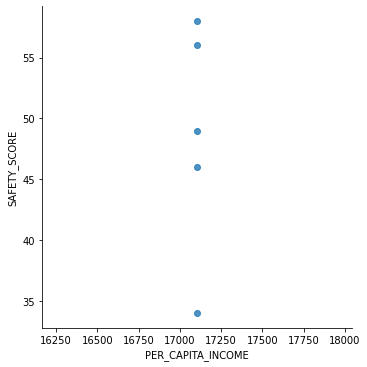

In [ ]:
sns.lmplot(x="PER_CAPITA_INCOME", y="SAFETY_SCORE", data=q1)

There is no relationship between PER_CAPITA_INCOME and SAFETY_SCORE for schools on the "EAST SIDE".

### 2. What is the relationship between Environment Score and Hardship-Index of school with per capita income greater than 15,000?

In [ ]:
sql = '''SELECT Environment_Score, HARDSHIP_INDEX FROM Totaldata WHERE PER_CAPITA_INCOME > 15000'''
q2 = pd.read_sql(sql, conn)
q2

,Environment_Score,HARDSHIP_INDEX
0,41.0,73.0
1,21.0,41.0
2,31.0,47.0
3,64.0,3.0
4,53.0,70.0
...,...,...
401,47.0,1.0
402,37.0,70.0
403,53.0,42.0
404,41.0,46.0


In [ ]:
x = q2['Environment_Score'].values.reshape(-1,1)
y = q2['HARDSHIP_INDEX'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[-0.28499007]]
[54.72098055]


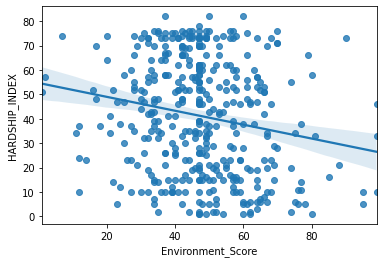

In [ ]:
sns.regplot(x="Environment_Score", y="HARDSHIP_INDEX",data=q2,fit_reg=True)

There's slight evidence that HARDSHIP_INDEX decreases with increase in ENVIRONMENT_SCORE with slope -0.284 for schools with per capita income greater than 15,000.

### 3. How do safety scores of school vary from different areas of the city?

In [ ]:
sql = """Select COMMUNITY_AREA_NAME, sum(SAFETY_SCORE) from Totaldata group by COMMUNITY_AREA_NAME"""
q3 = pd.read_sql(sql, conn)
q3

,COMMUNITY_AREA_NAME,sum(SAFETY_SCORE)
0,ALBANY PARK,476.0
1,ARCHER HEIGHTS,91.0
2,ARMOUR SQUARE,130.0
3,ASHBURN,360.0
4,AUBURN GRESHAM,340.0
5,AUSTIN,933.0
6,AVALON PARK,84.0
7,AVONDALE,225.0
8,BELMONT CRAGIN,576.0
9,BEVERLY,282.0


In [ ]:
q3.describe()

,sum(SAFETY_SCORE)
count,77.000000
mean,360.363636
std,233.980707
min,28.000000
25%,189.000000
50%,331.000000
75%,488.000000
max,1206.000000


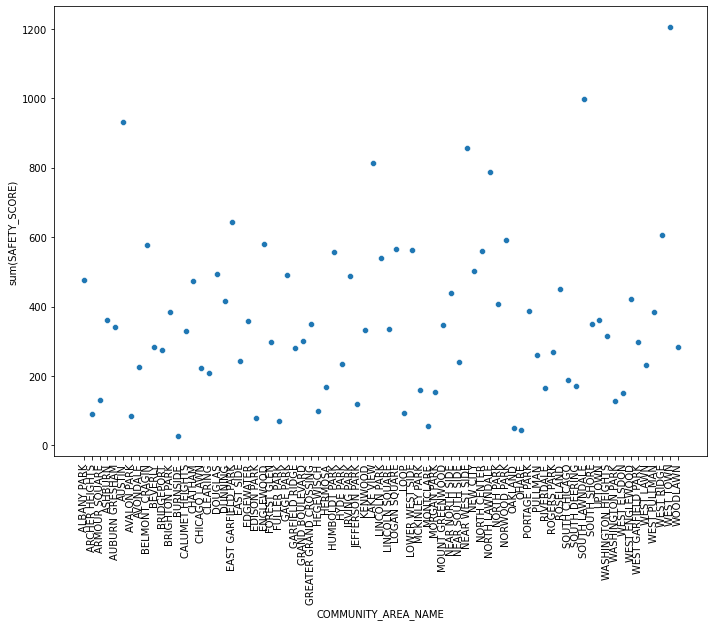

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
p = sns.scatterplot(data = q3, x = "COMMUNITY_AREA_NAME", y = "sum(SAFETY_SCORE)")
p = plt.setp(p.get_xticklabels(), rotation = 90)

The mean of sums of safety scores for all schools is 360 with a standard deviation of 234, but according to the scatter plot, we can see that it is randomly scattered.

### 4. Determine relationship between Instruction_Score to Average_Teacher_Attendance:

In [ ]:
sql = "SELECT CAST(Average_Teacher_Attendance as INT), Instruction_Score from Totaldata"
q4 = pd.read_sql(sql, conn)
q4

,CAST(Average_Teacher_Attendance as INT),Instruction_Score
0,0,33.0
1,94,30.0
2,96,37.0
3,95,67.0
4,94,51.0
...,...,...
556,0,41.0
557,0,58.0
558,0,28.0
559,0,63.0


In [ ]:
x = q4['CAST(Average_Teacher_Attendance as INT)'].values.reshape(-1,1)
y = q4['Instruction_Score'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.01417812]]
[46.93215823]


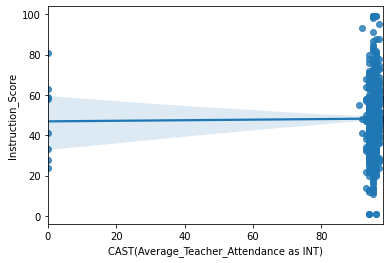

In [ ]:
sns.regplot(x="CAST(Average_Teacher_Attendance as INT)", y = "Instruction_Score", data = q4, fit_reg = True)

From the linear regression and regression plot, we can see that there is no relationship between Average_Teacher_Attendance and Institution_Score.

### 5. Is the relationship between PERCENT_HOUSEHOLDS_BELOW_POVERTY between different community areas normally distributed?

In [ ]:
sql = "SELECT PERCENT_HOUSEHOLDS_BELOW_POVERTY, COMMUNITY_AREA_NAME FROM Totaldata"
q5 = pd.read_sql(sql, conn)
q5_2 = q5.pivot(columns='COMMUNITY_AREA_NAME', values = 'PERCENT_HOUSEHOLDS_BELOW_POVERTY')
q5_2.describe()

COMMUNITY_AREA_NAME,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,BRIDGEPORT,BRIGHTON PARK,BURNSIDE,CALUMET HEIGHTS,CHATHAM,CHICAGO LAWN,CLEARING,DOUGLAS,DUNNING,EAST GARFIELD PARK,EAST SIDE,EDGEWATER,EDISON PARK,ENGLEWOOD,FOREST GLEN,FULLER PARK,GAGE PARK,GARFIELD RIDGE,GRAND BOULEVARD,GREATER GRAND CROSSING,HEGEWISCH,HERMOSA,HUMBOLDT PARK,HYDE PARK,IRVING PARK,JEFFERSON PARK,KENWOOD,LAKE VIEW,LINCOLN PARK,LINCOLN SQUARE,LOGAN SQUARE,LOOP,LOWER WEST SIDE,MCKINLEY PARK,MONTCLARE,MORGAN PARK,MOUNT GREENWOOD,NEAR NORTH SIDE,NEAR SOUTH SIDE,NEAR WEST SIDE,NEW CITY,NORTH CENTER,NORTH LAWNDALE,NORTH PARK,NORWOOD PARK,OAKLAND,OHARE,PORTAGE PARK,PULLMAN,RIVERDALE,ROGERS PARK,ROSELAND,SOUTH CHICAGO,SOUTH DEERING,SOUTH LAWNDALE,SOUTH SHORE,UPTOWN,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
count,8.0,2.0,3.0,8.0,10.0,2.300000e+01,3.0,4.0,1.200000e+01,4.0,5.0,8.000000e+00,1.0,6.0,9.000000e+00,7.000000e+00,3.0,11.0,6.0,1.300000e+01,5.0,6.0,1.0,1.700000e+01,3.0,2.0,1.000000e+01,5.0,8.000000e+00,10.0,2.0,4.0,1.300000e+01,4.0,9.000000e+00,2.0,7.000000e+00,1.100000e+01,7.000000e+00,5.0,1.100000e+01,1.0,1.100000e+01,3.0,1.0,4.0,4.0,7.000000e+00,3.000000e+00,16.0,13.0,7.0,1.600000e+01,5.0,8.000000e+00,1.0,1.0,7.000000e+00,5.0,4.0,6.000000e+00,1.300000e+01,7.000000e+00,4.0,2.100000e+01,9.000000e+00,7.0,9.000000e+00,5.0,3.0,1.300000e+01,8.000000e+00,4.0,10.0,9.0,2.000000e+01,8.000000e+00
mean,19.2,14.1,40.1,10.4,27.6,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,2.780000e+01,2.790000e+01,8.9,29.6,10.6,4.240000e+01,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,2.930000e+01,29.6,17.1,20.5,3.390000e+01,18.4,1.310000e+01,8.6,2.170000e+01,1.140000e+01,1.230000e+01,10.9,1.680000e+01,14.7,2.580000e+01,18.7,15.3,13.2,3.4,1.290000e+01,1.380000e+01,20.6,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,15.4,1.160000e+01,21.6,56.5,2.360000e+01,1.980000e+01,2.980000e+01,29.2,3.070000e+01,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17.2,1.470000e+01,3.070000e+01
std,0.0,0.0,0.0,0.0,0.0,1.089768e-14,0.0,0.0,3.710688e-15,0.0,0.0,3.798011e-15,NaN,0.0,3.768222e-15,3.837369e-15,0.0,0.0,0.0,7.395563e-15,0.0,0.0,NaN,1.464821e-14,0.0,0.0,3.744889e-15,0.0,3.798011e-15,0.0,0.0,0.0,7.395563e-15,0.0,1.884111e-15,0.0,3.837369e-15,3.726118e-15,1.918685e-15,0.0,3.726118e-15,NaN,7.452235e-15,0.0,NaN,0.0,0.0,1.918685e-15,2.175584e-15,0.0,0.0,0.0,1.467691e-14,0.0,9.495027e-16,NaN,NaN,1.918685e-15,0.0,0.0,3.891803e-15,3.697782e-15,3.837369e-15,0.0,3.640448e-15,3.768222e-15,0.0,3.768222e-15,0.0,0.0,7.395563e-15,7.596021e-15,0.0,0.0,0.0,5.467511e-15,3.798011e-15
min,19.2,14.1,40.1,10.4,27.6,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,2.780000e+01,2.790000e+01,8.9,29.6,10.6,4.240000e+01,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,2.930000e+01,29.6,17.1,20.5,3.390000e+01,18.4,1.310000e+01,8.6,2.170000e+01,1.140000e+01,1.230000e+01,10.9,1.680000e+01,14.7,2.580000e+01,18.7,15.3,13.2,3.4,1.290000e+01,1.380000e+01,20.6,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,15.4,1.160000e+01,21.6,56.5,2.360000e+01,1.980000e+01,2.980000e+01,29.2,3.070000e+01,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17.2,1.470000e+01,3.070000e+01
25%,19.2,14.1,40.1,10.4,27.6,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,2.780000e+01,2.790000e+01,8.9,29.6,10.6,4.240000e+01,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,2.930000e+01,29.6,17.1,20.5,3.390000e+01,18.4,1.310000e+01,8.6,2.170000e+01,1.140000e+01,1.230000e+01,10.9,1.680000e+01,14.7,2.580000e+01,18.7,15.3,13.2,3.4,1.290000e+01,1.380000e+01,20.6,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,15.4,1.160000e+01,21.6,56.5,2.360000e+01,1.980000e+01,2.980000e+01,29.2,3.070000e+01,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


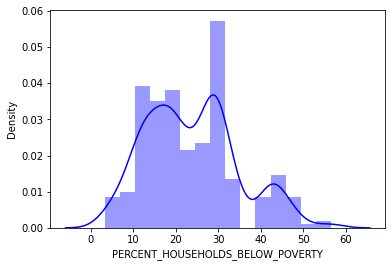

In [ ]:
sns.distplot(q5['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], color = 'b')

The percent_households_below_poverty is not normally distrubuted between different community areas.

### 6. Find the relationship between PER_CAPITA_INCOME to number of schools in each community area.

In [ ]:
sql = "SELECT COMMUNITY_AREA_NAME, sum(PER_CAPITA_INCOME), count(SCHOOL_ID) from Totaldata group by COMMUNITY_AREA_NAME"
q6 = pd.read_sql(sql, conn)
q6

,COMMUNITY_AREA_NAME,sum(PER_CAPITA_INCOME),count(SCHOOL_ID)
0,ALBANY PARK,170584,8
1,ARCHER HEIGHTS,32268,2
2,ARMOUR SQUARE,48444,3
3,ASHBURN,187856,8
4,AUBURN GRESHAM,155280,10
5,AUSTIN,367011,23
6,AVALON PARK,73362,3
7,AVONDALE,80156,4
8,BELMONT CRAGIN,185532,12
9,BEVERLY,158092,4


In [ ]:
x = q6['count(SCHOOL_ID)'].values.reshape(-1,1)
y = q6['sum(PER_CAPITA_INCOME)'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[19620.10499673]]
[32887.61164717]


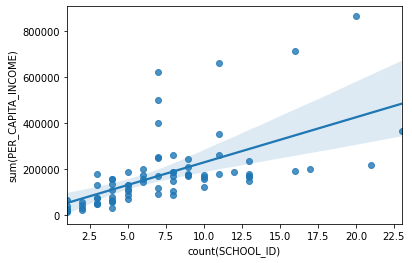

In [ ]:
sns.regplot(x = "count(SCHOOL_ID)", y = "sum(PER_CAPITA_INCOME)", data = q6, fit_reg = True)

There's a strong positive linear relationship between the number of schools in an area to the per_capita_income.

### 7. What is the relationship between safety scores of school in "Austin" and "Englewood"?

In [ ]:
sql = """SELECT SAFETY_SCORE, COMMUNITY_AREA_NAME FROM Totaldata WHERE 
      COMMUNITY_AREA_NAME = 'AUSTIN' or COMMUNITY_AREA_NAME = 'ENGLEWOOD'"""
q7 = pd.read_sql(sql, conn)
q7_2 = q7.pivot(columns = 'COMMUNITY_AREA_NAME', values = 'SAFETY_SCORE')
q7_2.describe()

COMMUNITY_AREA_NAME,AUSTIN,ENGLEWOOD
count,23.000000,17.000000
mean,40.565217,34.058824
std,10.706099,11.882080
min,21.000000,18.000000
25%,35.000000,28.000000
50%,39.000000,30.000000
75%,43.500000,38.000000
max,68.000000,62.000000


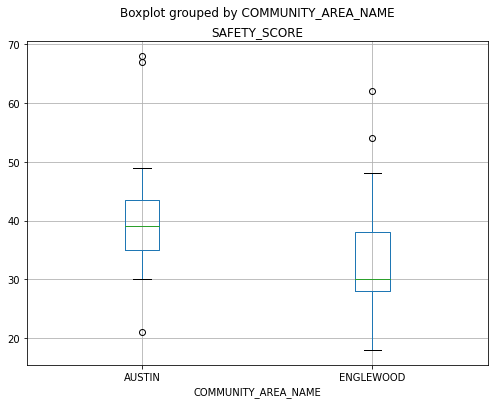

In [ ]:
q7.boxplot(column = "SAFETY_SCORE", by = "COMMUNITY_AREA_NAME", figsize = (8,6))
plt.show()

The average safety score of schools in the AUSTIN area are better than that of Englewood.

### 8. What is the relationship between PERCENT_AGED_16_UNEMPLOYED and Instruction_Score for schools with safety score over 60?

In [ ]:
q8 = "SELECT PERCENT_AGED_16_UNEMPLOYED, Instruction_Score FROM Totaldata WHERE SAFETY_SCORE > 60.0"
q8 = pd.read_sql(q8, conn)
q8

,PERCENT_AGED_16_UNEMPLOYED,Instruction_Score
0,5.7,67.0
1,7.0,77.0
2,17.3,80.0
3,4.7,43.0
4,5.2,52.0
...,...,...
130,6.6,52.0
131,9.0,49.0
132,5.2,51.0
133,8.8,28.0


In [ ]:
x = q8['Instruction_Score'].values.reshape(-1,1)
y = q8['PERCENT_AGED_16_UNEMPLOYED'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.08284228]]
[6.08412237]


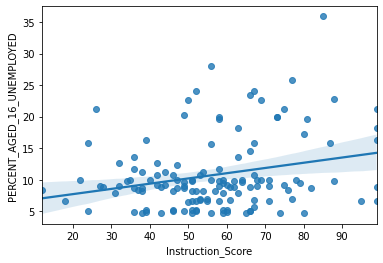

In [ ]:
sns.regplot(x="Instruction_Score", y = "PERCENT_AGED_16_UNEMPLOYED", data = q8, fit_reg = True)

There is not a strong linear relationship between Instruction Scores and PERCENT_AGED_16_UNEMPLOYED for schools where safety score is greater than 60.

### 9. How does PERCET_OF_HOUSEHOLD_CROWDED compare for areas where school safety score is greater than 70?

In [ ]:
sql = "SELECT COMMUNITY_AREA_NAME, sum(PERCENT_OF_HOUSING_CROWDED) FROM Totaldata WHERE SAFETY_SCORE > 70 GROUP BY COMMUNITY_AREA_NAME"
q9 = pd.read_sql(sql, conn)
q9

,COMMUNITY_AREA_NAME,sum(PERCENT_OF_HOUSING_CROWDED)
0,ALBANY PARK,22.6
1,BELMONT CRAGIN,10.8
2,BEVERLY,2.7
3,BRIDGEPORT,4.5
4,CALUMET HEIGHTS,2.1
5,CHATHAM,6.6
6,CLEARING,5.4
7,DUNNING,5.2
8,EDGEWATER,4.1
9,EDISON PARK,1.1


In [ ]:
q9.describe()

,sum(PERCENT_OF_HOUSING_CROWDED)
count,33.000000
mean,6.821212
std,5.558876
min,1.100000
25%,3.300000
50%,5.400000
75%,7.400000
max,23.400000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


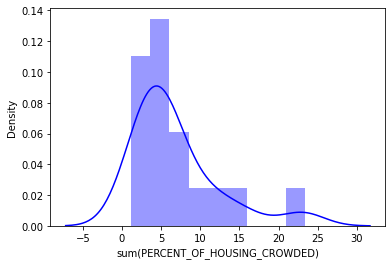

In [ ]:
sns.distplot(q9['sum(PERCENT_OF_HOUSING_CROWDED)'], color = 'b')

Percentage of crowded housing is most likely between 0-10% for schools with safety scores greater than 70.

### 10. Is there a relationship between community hardship to school environment scores for school who's safety score is less than 50?

In [ ]:
sql = "SELECT HARDSHIP_INDEX, Environment_Score FROM Totaldata WHERE SAFETY_SCORE < 50"
q10 = pd.read_sql(sql, conn)
q10

,HARDSHIP_INDEX,Environment_Score
0,73.0,41.0
1,41.0,21.0
2,47.0,31.0
3,91.0,32.0
4,85.0,39.0
...,...,...
324,89.0,51.0
325,55.0,47.0
326,93.0,27.0
327,70.0,47.0


In [ ]:
x = q10['Environment_Score'].values.reshape(-1,1)
y = q10['HARDSHIP_INDEX'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.22819658]]
[54.97462565]


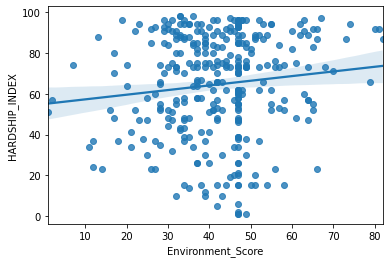

In [ ]:
sns.regplot(x="Environment_Score", y = "HARDSHIP_INDEX", data = q10, fit_reg = True)

There is not a strong linear relationship between school environment scores and hardship index in the community.